In [1]:
import numpy as np
import matplotlib.pyplot as plt

from myula import *
from psgla import *
import distributions as pds
import potentials as pot

**Define target densities**\
2D example A: 'Sparse' ground truth signal $u_{\text{true}}$, i.e. point on one of the coordinate axes.
Set $F(u) = \frac{1}{2\sigma^2} \lVert u - u_{\text{true}} \rVert_2^2$ and a sparsity prior $G(u) = \lambda \lVert u \rVert_1$.

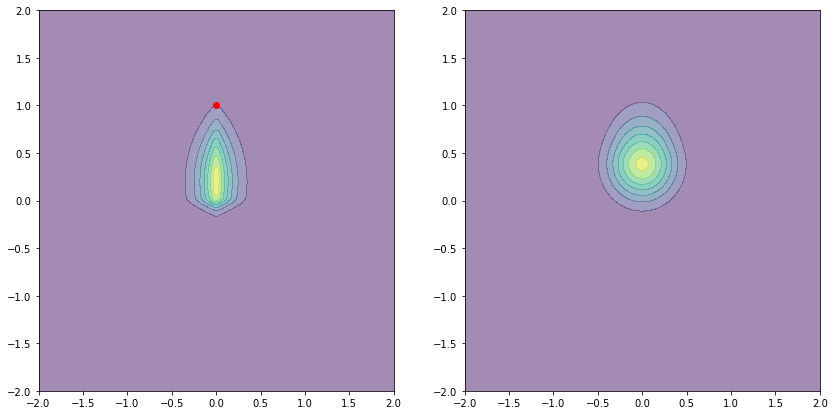

In [2]:
d = 2
u_true = np.array([[0],[1]])
std = 0.4
l1reg = 5
posterior = pds.L2Loss_SparsityReg(d=2, l2shift=u_true, l2scale=std, l1reg=l1reg)
X,Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.concatenate((np.reshape(X,(1,-1)),np.reshape(Y,(1,-1))), axis=0)
unscaled_dens_vals = posterior.unscaled_pdf(Z)

fig,ax = plt.subplots(1,2,figsize=(14,7))
unscaled_dens_plot = ax[0].contourf(X,Y,np.reshape(unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = ax[0].scatter(u_true[0],u_true[1],color='r')

# contour plot of a Moreau-Yosida regularized density
gamma = 0.1
my_posterior = pds.MY_L2Loss_SparsityReg(d=2, l2shift=u_true, l2scale=std, l1reg=l1reg, gamma=gamma)
my_unscaled_dens_vals = my_posterior.unscaled_pdf(Z)
my_unscaled_dens_plot = ax[1].contourf(X,Y,np.reshape(my_unscaled_dens_vals,(100,100)),alpha=0.5)

plt.show()

**Sample using PSGLA and MYULA**

In [3]:
tau = 0.01
max_iter = np.max((100,np.round(10/tau)))
n_samples = 100
x0 = np.zeros((2,n_samples))
psgla = PSGLA(max_iter, tau, x0, pd = posterior)
x_psgla = psgla.simulate()

sampler_myula = MYULA(max_iter, tau, gamma, x0, pd = posterior)
x_myula = sampler_myula.simulate()

**Contour plot the true density and the MY-density and compare samples**

PSGLA: Number of samples with correct support: 18
MYULA: Number of samples with correct support: 0


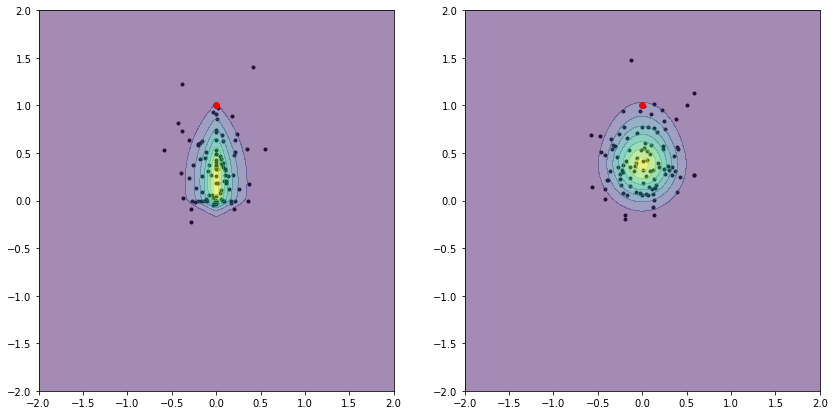

In [4]:
print("PSGLA: Number of samples with correct support: {}".format(np.sum(np.logical_and(np.abs(x_psgla[0,:])<1e-13, np.abs(x_psgla[1,:])>1e-13))))
print("MYULA: Number of samples with correct support: {}".format(np.sum(np.logical_and(np.abs(x_myula[0,:])<1e-13, np.abs(x_myula[1,:])>1e-13))))

fig, ax = plt.subplots(1, 2, figsize=(14,7))
scatter_psgla = ax[0].scatter(x_psgla[0,:], x_psgla[1,:], c='k', marker='.')
scatter_myula = ax[1].scatter(x_myula[0,:], x_myula[1,:], c='k', marker='.')

unscaled_dens_plot = ax[0].contourf(X,Y,np.reshape(unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = ax[0].scatter(u_true[0],u_true[1],color='r')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)

my_unscaled_dens_vals = my_posterior.unscaled_pdf(Z)
my_unscaled_dens_plot = ax[1].contourf(X,Y,np.reshape(my_unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = ax[1].scatter(u_true[0],u_true[1],color='r')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-2,2)

plt.show()




TODO: Experiment B: Generate a few noisy observations of the ground truth point and try sampling from the L2 loss with L1 regularization, this corresponds to mean estimation.